# 1. Simple Linear Regression

Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line

A measure of the degree of association between two variables that are assumed to have a linear relationship, that is, to be related in such a manner that their values form a straight line when plotted on a graph.

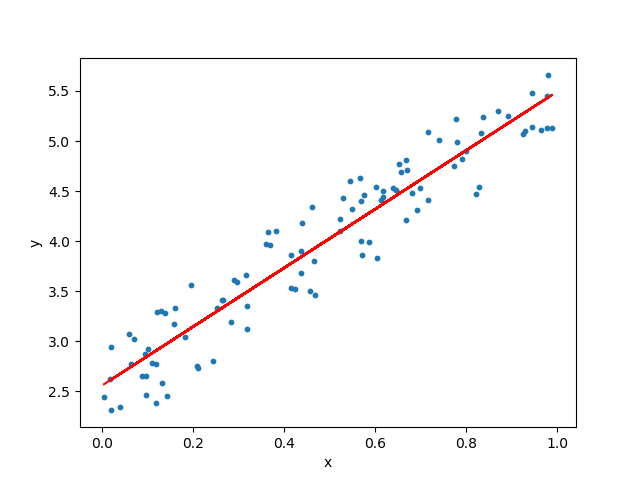

Y = mx + c

- c : intercept
- m : slope


Linear regression algorithm will provide the optimal intercept and slope values. The controllable values ​​are intercept (c) and slope (m).


## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv')
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Info Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

## Describe Dataset

In [4]:
# Descriptive statistic from numerical variabel
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
# Descriptive statistic from non-numerical variabel
df.describe(exclude='number')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,18396,18396,18396,18396,18396,18396,12233,18395
unique,330,18134,3,5,305,58,33,8
top,Reservoir,14 Rose St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,541,3,12095,12034,2002,610,1163,6343


In this case, the model that we used is simple linear regression, so in this experiment, we will only try to use 1 independent variable.

One of the considerations for choosing the independent variable is : by looking at the correlation value in the correlation matrix (between the dependent and independent variable).

## Correlation Matrix

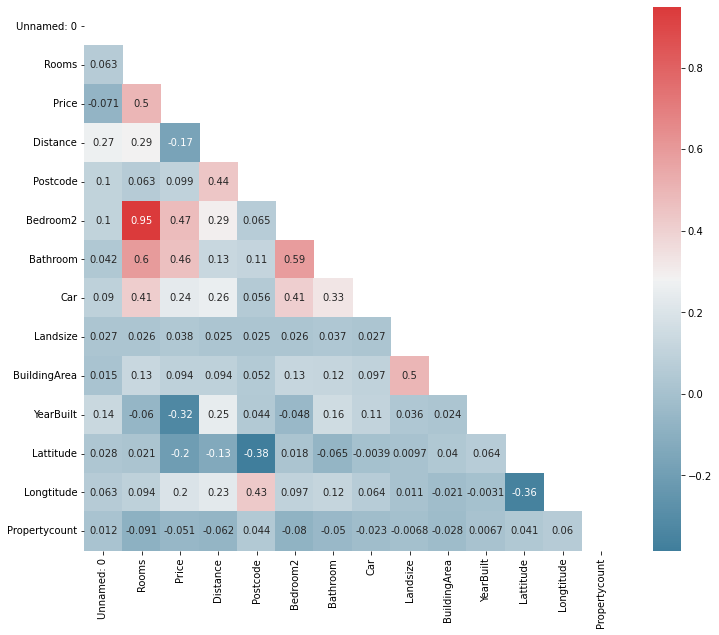

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 12, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Define dependent variable and independent variable for our Simple Linear Regression:
- Dependent variable : `Price`
- Independent variable : `Bedroom2` (the highest positive correlation value among other variables)

## Handling Missing Value

In [7]:
# check the missing value
missing_val = df.isnull().sum().sort_values()
missing_val

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Regionname           1
Postcode             1
Distance             1
Propertycount        1
Lattitude         3332
Longtitude        3332
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
CouncilArea       6163
YearBuilt         9438
BuildingArea     10634
dtype: int64

fill the missing value of the independent variable `Bedroom2` with 0

In [8]:
df['Bedroom2'].fillna('0', inplace=True)

check the missing value again

In [9]:
missing_val = df.isnull().sum().sort_values()
missing_val

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Bedroom2             0
Postcode             1
Distance             1
Regionname           1
Propertycount        1
Lattitude         3332
Longtitude        3332
Bathroom          3471
Car               3576
Landsize          4793
CouncilArea       6163
YearBuilt         9438
BuildingArea     10634
dtype: int64

## Visualize the scatter plot

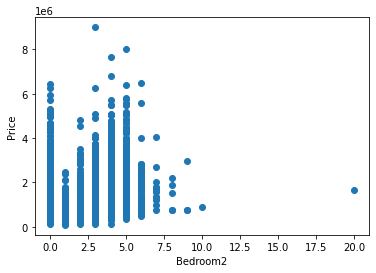

In [10]:
plt.scatter(df.Bedroom2, df.Price)
plt.xlabel('Bedroom2')
plt.ylabel('Price')
plt.show()

# Define x and y

In [11]:
df2 = df[['Price','Bedroom2']]
df2

,Price,Bedroom2
0,1480000.0,2.0
1,1035000.0,2.0
2,1465000.0,3.0
3,850000.0,3.0
4,1600000.0,3.0
...,...,...
18391,622500.0,2.0
18392,2500000.0,4.0
18393,1100000.0,4.0
18394,1285000.0,4.0


In [12]:
x = df2[['Bedroom2']]
y = df2[['Price']]

## Train Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
x_train.shape

(14716, 1)

In [15]:
y_train.shape

(14716, 1)

In [16]:
x_test.shape

(3680, 1)

In [17]:
y_test.shape

(3680, 1)

## Define Model

In [18]:
lr = LinearRegression()
lr.fit(x_train,
       y_train)

LinearRegression()

Print intercept and slope value of the model

In [19]:
intercept = lr.intercept_[0]
intercept

753946.4578474571

In [20]:
slope = lr.coef_[0][0]
slope

127929.98391538032

Coefficient value = positive -> the relationship between `Bedroom2` and `Price` according to the model = positive.

## Prediction

In [21]:
y_pred = lr.predict(x_test).flatten()
y_pred

array([1265666.39350898,  753946.45784746, 1137736.4095936 , ...,
       1009806.42567822, 1137736.4095936 , 1137736.4095936 ])

In [22]:
df = pd.DataFrame({'Actual' : y_test['Price'],
                   'Prediction' : y_pred}).reset_index().iloc[:, 1:]
df

,Actual,Prediction
0,1475000.0,1.265666e+06
1,1901000.0,7.539465e+05
2,955000.0,1.137736e+06
3,1010000.0,1.137736e+06
4,810000.0,1.137736e+06
...,...,...
3675,1460000.0,7.539465e+05
3676,585500.0,1.009806e+06
3677,1000000.0,1.009806e+06
3678,760000.0,1.137736e+06


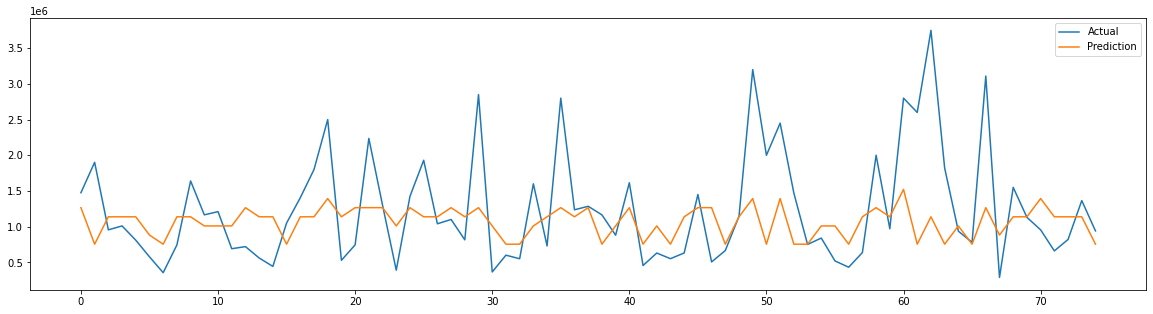

In [23]:
# The prediction result
df.head(75).plot(kind='line',
                 figsize=(20,5))

## Evaluation Metrics

In [24]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE) :', mae)
print('Mean Squared Error (MSE) :', mse)
print('Root Mean Squared Error (RMSE) :', rmse)
print('R-Squared (R2_Score) :', r2_score)

Mean Absolute Error (MAE) : 432425.97677149926
Mean Squared Error (MSE) : 368915905382.0195
Root Mean Squared Error (RMSE) : 607384.479042739
R-Squared (R2_Score) : 0.07850943791746612


Based on the graph above, it can be seen that the predicted value is still far away from the the actual value and based on the evaluation metrics, it can be concluded that the error value generated by the model is still too high. This is because in this experimental, we only use 1 independent variable to predict the dependent variable.

# Multiple Linear Regression

- Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.

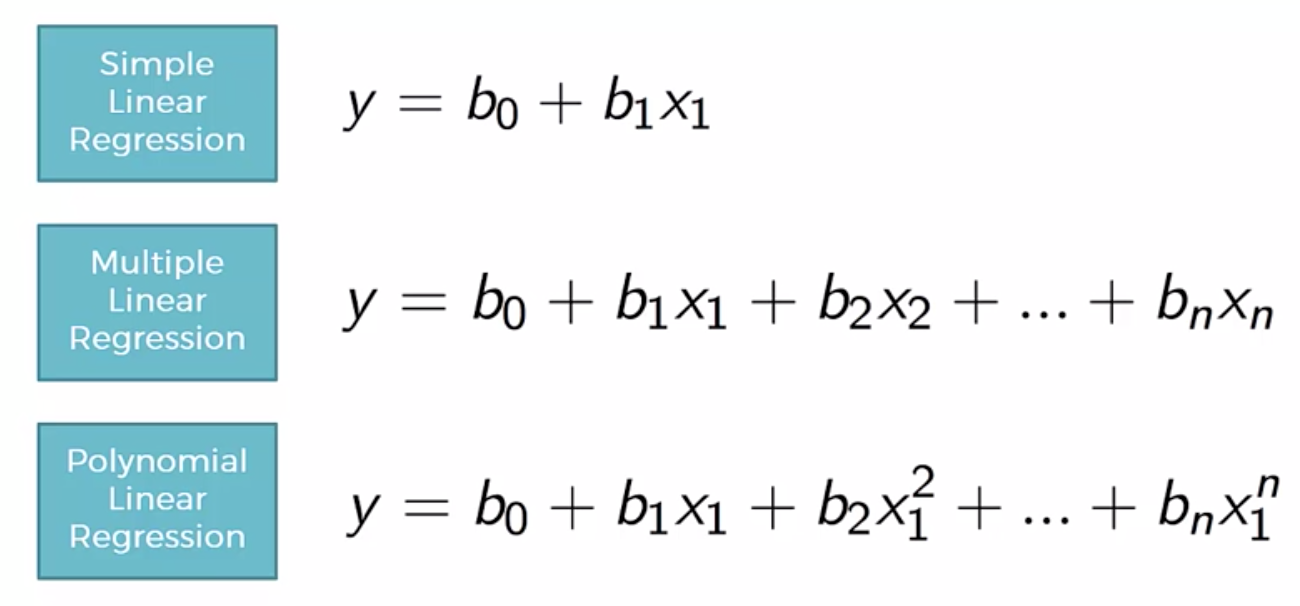

## Load Data

In [25]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Gonnuru/Admission_Prediction/master/Admission_Predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


Goals:
- Predicting the dependent variable : `Chance of Admit`

## Dataset Info

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Drop Variabel yang kurang relevan

In [27]:
dataset = dataset.drop(['Serial No.'], axis=1)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Define x dan y

In [28]:
x = dataset.drop(['Chance of Admit'], axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [29]:
y = dataset['Chance of Admit']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

## Train Test Split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Define the Model

In [31]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

## Print intercept and slope value of the model

In [32]:
print(mlr.intercept_)
print(mlr.coef_)

-1.421447071901646
[0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]


In [33]:
pd.DataFrame({'Variables': x.columns.values,
              'Coefficient': mlr.coef_})

,Variables,Coefficient
0,GRE Score,0.002434
1,TOEFL Score,0.002996
2,University Rating,0.002569
3,SOP,0.001814
4,LOR,0.017238
5,CGPA,0.112527
6,Research,0.024027


## Prediction

In [34]:
y_pred = mlr.predict(x_test).flatten()
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

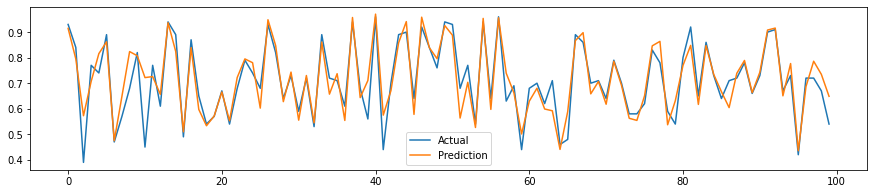

In [35]:
line = pd.DataFrame({'Actual':y_test.values.flatten(),
                     'Prediction':y_pred})
line.plot(kind='line', figsize=(15,3))

Based on the visualization of the actual value and the predicted value, it can be concluded: the difference between the actual and predicted values ​​is not too much different. 

This is because our model uses >1 independent variables -> make the model able to predict the results more accurately.

## Evaluation Metrics

In [36]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE) :', mae)
print('Mean Squared Error (MSE) :', mse)
print('Root Mean Squared Error (RMSE) :', rmse)
print('R-Squared (R2_Score) :', r2_score)

Mean Absolute Error (MAE) : 0.04272265427705367
Mean Squared Error (MSE) : 0.0037046553987884084
Root Mean Squared Error (RMSE) : 0.0608658804157831
R-Squared (R2_Score) : 0.8188432567829629
